<a href="https://colab.research.google.com/github/Rasamps/drug-misuse/blob/master/dim_reduction_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing dimensionality reduction on the drug consumption data set.
Do this using random forests. We see which attributes are regularly chosen to split on and select these as the dimensions to remain after reduction.

In [0]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
df = pd.read_csv("drug_cons_data.csv", header = 0)

le = preprocessing.LabelEncoder()

for col in df.columns:
  if (df[col].dtype == np.object):
    df[col] = le.fit_transform(df[col])

In [0]:
#Break the attributes down into clumps based on the separation given by UCI for the original dataset.
person_data = df[['Age','Gender','Education','Country','Nscore','Escore','Oscore','Ascore','Cscore','Imp','SS']]
drug_group_1 = df[['Alc','Amph','Amyl','Benz']]
drug_group_2 = df[['Caff','Cann','Choc','Coke']]
drug_group_3 = df[['Crack','Ect','Heroin','Keta']]
drug_group_4 = df[['Legalh','LSD','Meth','Shrooms']]
drug_group_5 = df[['Nico','Semer','VSA']]

In [0]:
def get_attributes(some_model,trainset,targets):
  #Set up initial variables for building plots and saving results.
  results = np.empty([5,10], dtype = np.object)
  target_list = targets.columns
  cols = ['b','r','g','m','c']
  features = trainset.columns
  
  #Loop through each target variable and build the plots.
  for index in range(0,len(target_list)):
    #Fit the model on the current target variable.
    some_model.fit(trainset,targets[target_list[index]])
    top_features = some_model.feature_importances_
    #sort the ten features by highest to lowest relative importance.
    indices = np.argsort(top_features)[-10:]
    #Select out the top ten features and save them in a matrix containing the results.
    results[index,:] = features[indices]
    #Create the plot displaying the top ten features.
    plt.title("Important Features For Predicting" + target_list[index],color = 'w')
    plt.barh(range(len(indices)), top_features[indices], color = cols[index], align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices], color = 'w')
    plt.xticks(color = 'w')
    plt.xlabel('Relative Importance', color = 'w')
    #Displays the resulting plot.
    plt.show()

  return results

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

rfc_model = RandomForestClassifier(n_estimators = 2000, max_depth = 10, random_state = 1)

#Select random attributes from the four clumps to use as the prediction label in our random forests.
target_1 = (drug_group_1.sample(1,axis = 1)).columns[0]
target_2 = (drug_group_2.sample(1,axis = 1)).columns[0]
target_3 = (drug_group_3.sample(1,axis = 1)).columns[0]
target_4 = (drug_group_4.sample(1,axis = 1)).columns[0]
target_5 = (drug_group_5.sample(1,axis = 1)).columns[0]

#Separate into targets and training data.
target = df[[target_1,target_2,target_3,target_4,target_5]]
temp_train = df.drop([target_1,target_2,target_3,target_4,target_5], axis = 1)

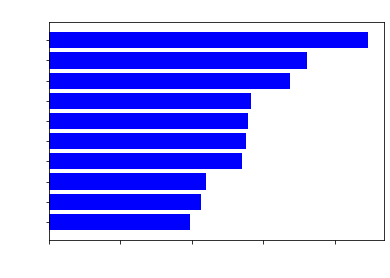

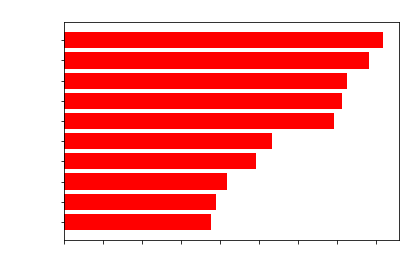

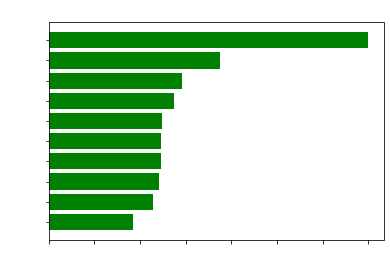

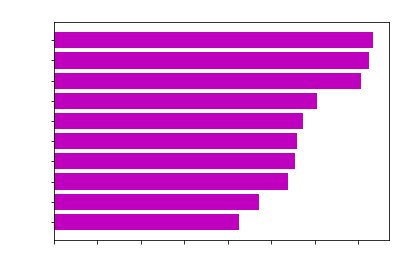

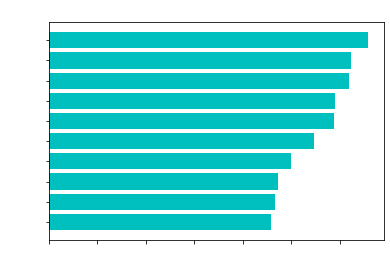

[['SS' 'Ect' 'LSD' 'Oscore' 'Ascore' 'Escore' 'Cscore' 'Coke' 'Nscore'
  'Amph']
 ['Alc' 'Education' 'Cann' 'Imp' 'SS' 'Oscore' 'Escore' 'Cscore' 'Ascore'
  'Nscore']
 ['SS' 'Cscore' 'Amph' 'Escore' 'Oscore' 'Ascore' 'LSD' 'Nscore' 'Coke'
  'Crack']
 ['Legalh' 'Coke' 'Cscore' 'Escore' 'Ascore' 'Oscore' 'Nscore' 'Crack'
  'Amph' 'Country']
 ['Coke' 'LSD' 'Legalh' 'Crack' 'Oscore' 'Escore' 'Amph' 'Ascore'
  'Cscore' 'Nscore']]


In [54]:
#Make the call to get_attributes
feature_res = get_attributes(rfc_model,temp_train,target)
print(feature_res)

In [57]:
#Find the frequencies for each feature in our results
check_feature = np.unique(feature_res)

def search_res(feature):
  count = 0
  for row_i in range(0,5):
    for col_j in range(0,10):
      if (feature == feature_res[row_i,col_j]):
        count += 1
  return count

freqs = []
for feat in check_feature:
  freqs.append(search_res(feat))

print(check_feature)
print(freqs)

['Alc' 'Amph' 'Ascore' 'Cann' 'Coke' 'Country' 'Crack' 'Cscore' 'Ect'
 'Education' 'Escore' 'Imp' 'LSD' 'Legalh' 'Nscore' 'Oscore' 'SS']
[1, 4, 5, 1, 4, 1, 3, 5, 1, 1, 5, 1, 3, 2, 5, 5, 3]


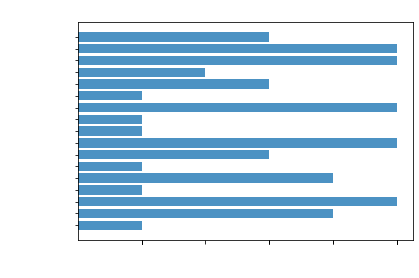

In [65]:
plt.barh(check_feature, freqs, align = 'center', alpha = 0.8)
plt.ylabel('Attributes', color = 'w')
plt.yticks(check_feature, color = 'w')
plt.xlabel('Frequency of Attribute', color = 'w')
plt.xticks(freqs, color = 'w')
plt.title('Frequency of Top Ten features from Five Fitted Models', color = 'w')

plt.show()

It appears that the most indicative features are evidently four of the five personality scores (Escore, Cscore, Oscore, Nscore) and the legal high indicator (Legalh). 

There are other features which do appear freqeuntly that may be worthwhile using depending on the dimensionality were after.